# 사망 교통사고 정보
데이터 링크 : https://taas.koroad.or.kr/api/selectSttDataSet.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
cd /content/drive/MyDrive/일일 데이터 분석/

/content/drive/MyDrive/일일 데이터 분석


In [ ]:
data = pd.read_csv('./사망 교통사고 정보.csv',encoding='cp949')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39944 entries, 0 to 39943
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           39944 non-null  int64  
 1   발생년월일시        39944 non-null  int64  
 2   주야            39944 non-null  object 
 3   요일            39944 non-null  object 
 4   사망자수          39944 non-null  int64  
 5   사상자수          39944 non-null  int64  
 6   중상자수          39944 non-null  int64  
 7   경상자수          39944 non-null  int64  
 8   부상신고자수        39944 non-null  int64  
 9   발생지시도         39944 non-null  object 
 10  발생지시군구        39944 non-null  object 
 11  사고유형_대분류      39944 non-null  object 
 12  사고유형_중분류      39944 non-null  object 
 13  사고유형          39944 non-null  object 
 14  법규위반          39944 non-null  object 
 15  도로형태_대분류      39944 non-null  object 
 16  도로형태          39944 non-null  object 
 17  당사자종별_1당_대분류  39944 non-null  object 
 18  당사자종별_2당_대분류  39944 non-nu

In [ ]:
data.isnull().sum()

발생년             0
발생년월일시          0
주야              0
요일              0
사망자수            0
사상자수            0
중상자수            0
경상자수            0
부상신고자수          0
발생지시도           0
발생지시군구          0
사고유형_대분류        0
사고유형_중분류        0
사고유형            0
법규위반            0
도로형태_대분류        0
도로형태            0
당사자종별_1당_대분류    0
당사자종별_2당_대분류    0
발생위치X_UTMK      0
발생위치Y_UTMK      0
경도              0
위도              0
dtype: int64

In [ ]:
data.head()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.93,37.61
1,2012,2012010101,야간,일,1,6,5,0,0,전북,정읍시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,946537,1737695,126.91,35.63
2,2012,2012010108,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.83,36.49
3,2012,2012010110,주간,일,2,2,0,0,0,경남,합천군,차대차,측면충돌,측면충돌,과속,교차로,교차로내,승합차,승용차,1059321,1748774,128.16,35.73
4,2012,2012010103,야간,일,1,1,0,0,0,경북,예천군,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,1070222,1834630,128.28,36.51


In [ ]:
def preprocessing(dataframe):
  df = dataframe.copy()

  df['년'] = df['발생년월일시'].map(lambda x: str(x)[:4]).astype(np.int64)
  df['월'] = df['발생년월일시'].map(lambda x: str(x)[4:6]).astype(np.int64)
  df['일'] = df['발생년월일시'].map(lambda x: str(x)[6:8]).astype(np.int64)
  df['시'] = df['발생년월일시'].map(lambda x: str(x)[8:]).astype(np.int64)
  df['일시'] = df['발생년월일시'].map(lambda x: str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:8])
  df['일시'] = df['일시'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))

  df = df.drop(['발생년','발생년월일시','발생위치X_UTMK','발생위치Y_UTMK','당사자종별_1당_대분류','당사자종별_2당_대분류'],axis=1)
  return df

ta = preprocessing(data)

In [ ]:
ta.head()

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,경도,위도,년,월,일,시,일시
0,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,126.93,37.61,2012,1,1,1,2012-01-01
1,야간,일,1,6,5,0,0,전북,정읍시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,126.91,35.63,2012,1,1,1,2012-01-01
2,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,126.83,36.49,2012,1,1,8,2012-01-01
3,주간,일,2,2,0,0,0,경남,합천군,차대차,측면충돌,측면충돌,과속,교차로,교차로내,128.16,35.73,2012,1,1,10,2012-01-01
4,야간,일,1,1,0,0,0,경북,예천군,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,128.28,36.51,2012,1,1,3,2012-01-01


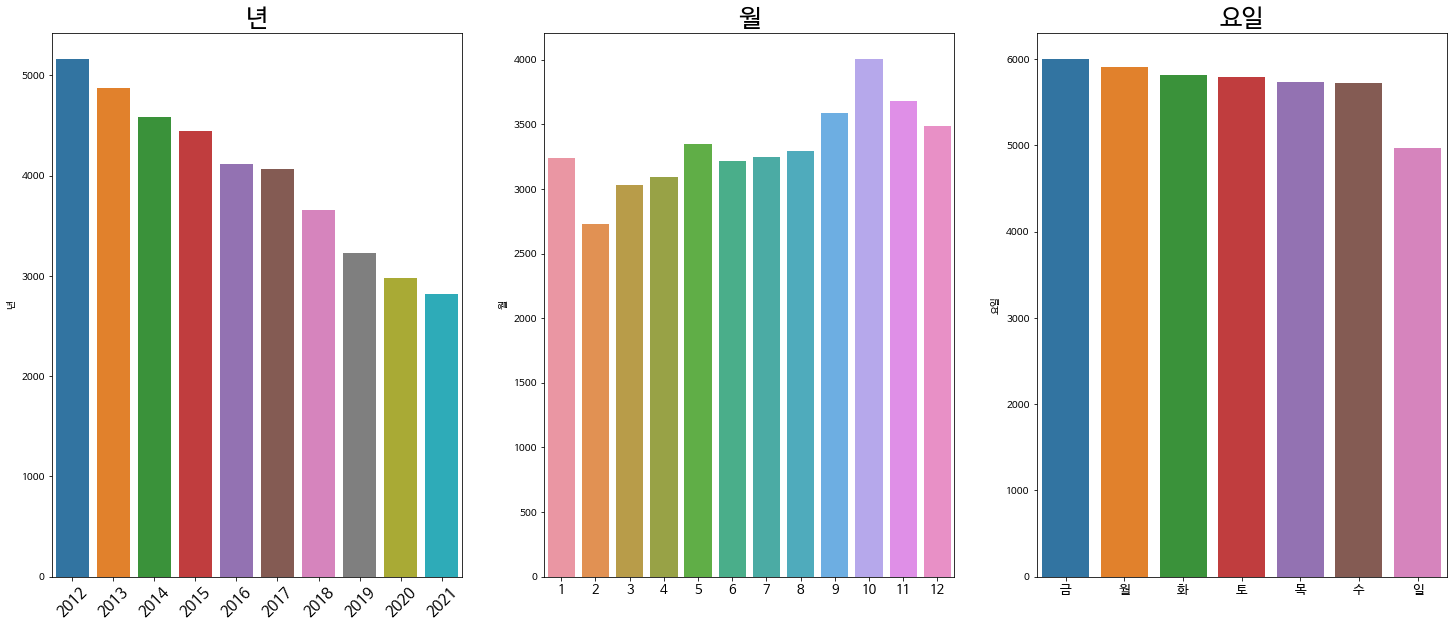

In [ ]:
# 년 월 일 별 사고수 분포
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.barplot(x = ta['년'].value_counts().index ,y = ta['년'].value_counts())
plt.title('년',size=25)
plt.xticks(rotation=45,size=15)

plt.subplot(1,3,2)
sns.barplot(x = ta['월'].value_counts().index ,y = ta['월'].value_counts())
plt.title('월',size=25)
plt.xticks(size=13)

plt.subplot(1,3,3)
sns.barplot(x = ta['요일'].value_counts().index ,y = ta['요일'].value_counts())
plt.title('요일',size=25)
plt.xticks(size=13)

plt.show()

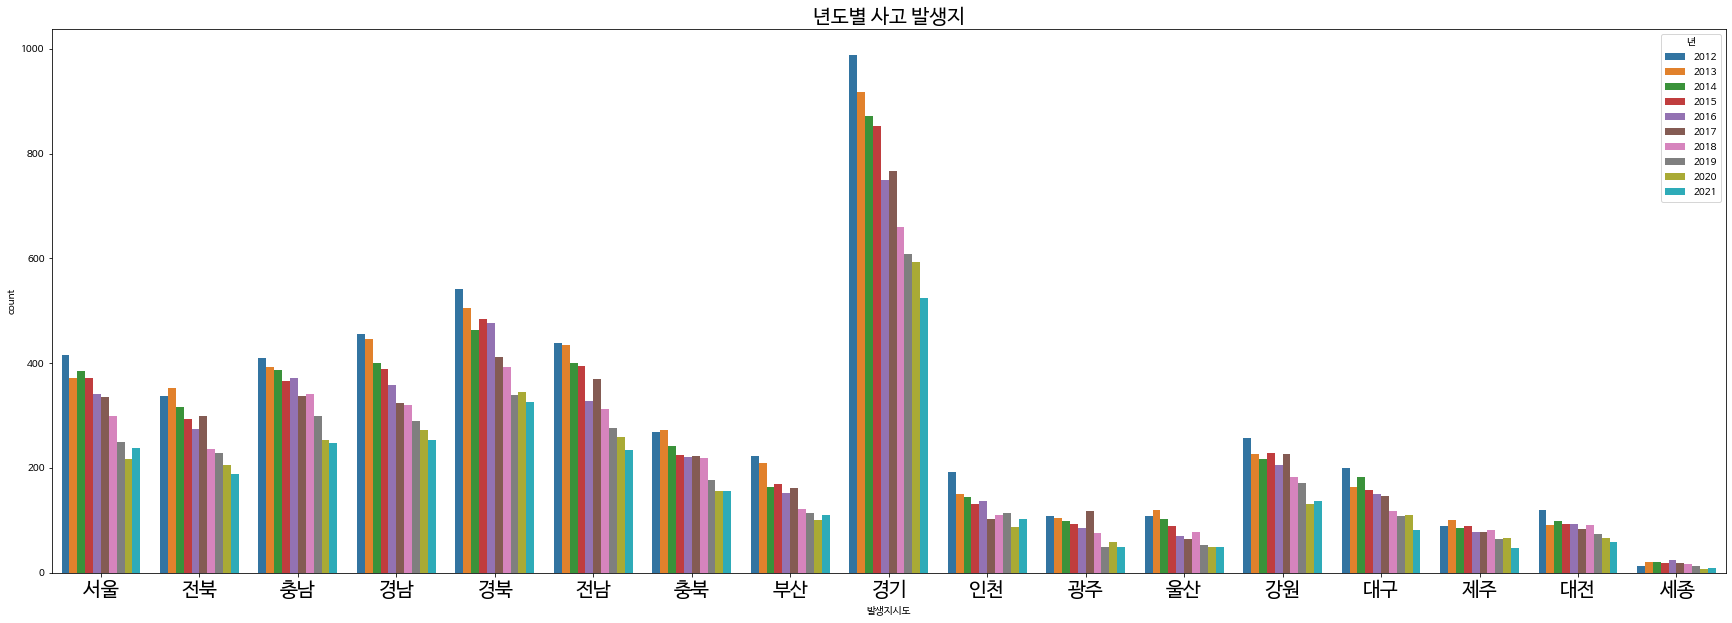

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(ta['발생지시도'],hue=ta['년'])
plt.title('년도별 사고 발생지',size=20)
plt.xticks(size=20)
plt.show()

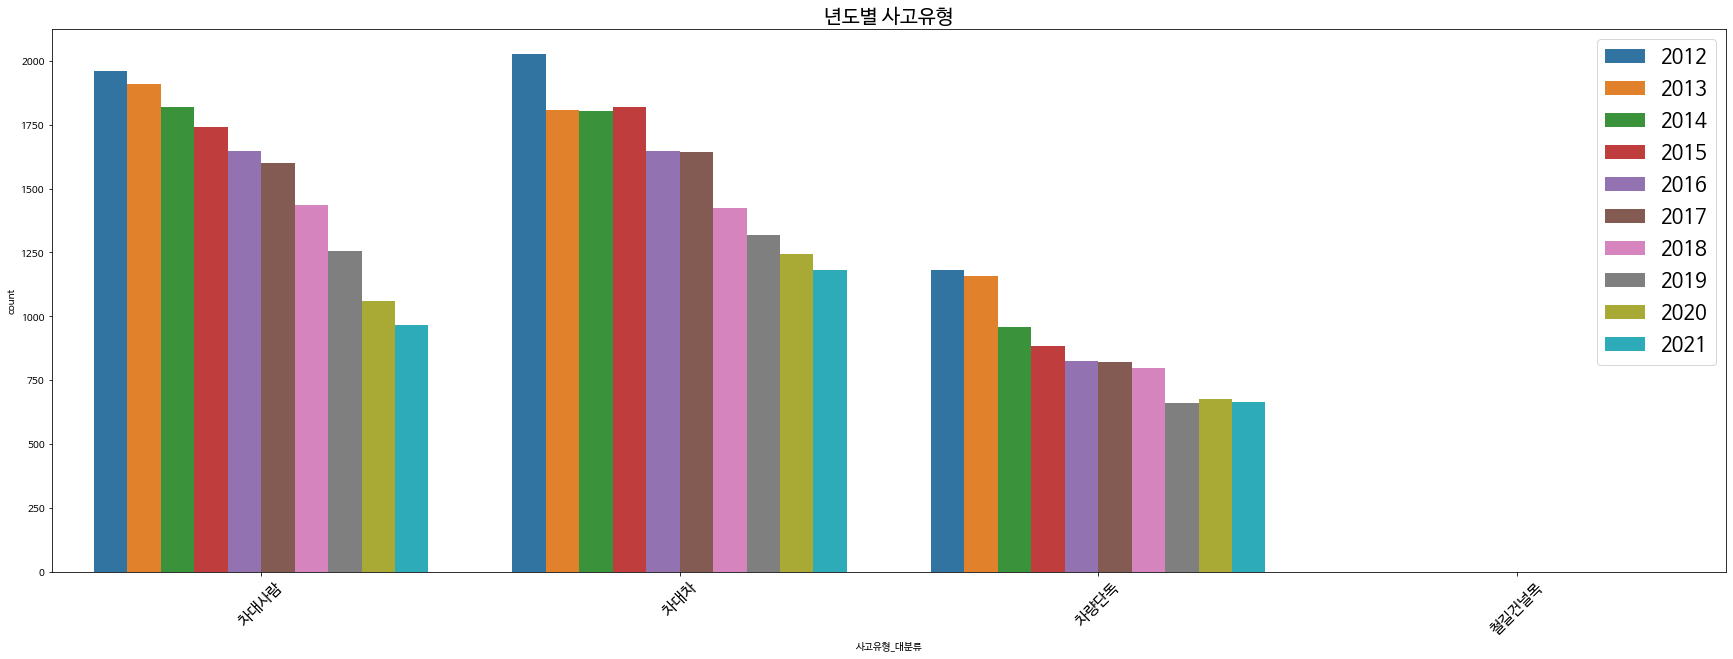

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(ta['사고유형_대분류'],hue=ta['년'])
plt.title('년도별 사고유형',size=20)
plt.xticks(rotation=45,size=15)
plt.legend(fontsize=20)
plt.show()

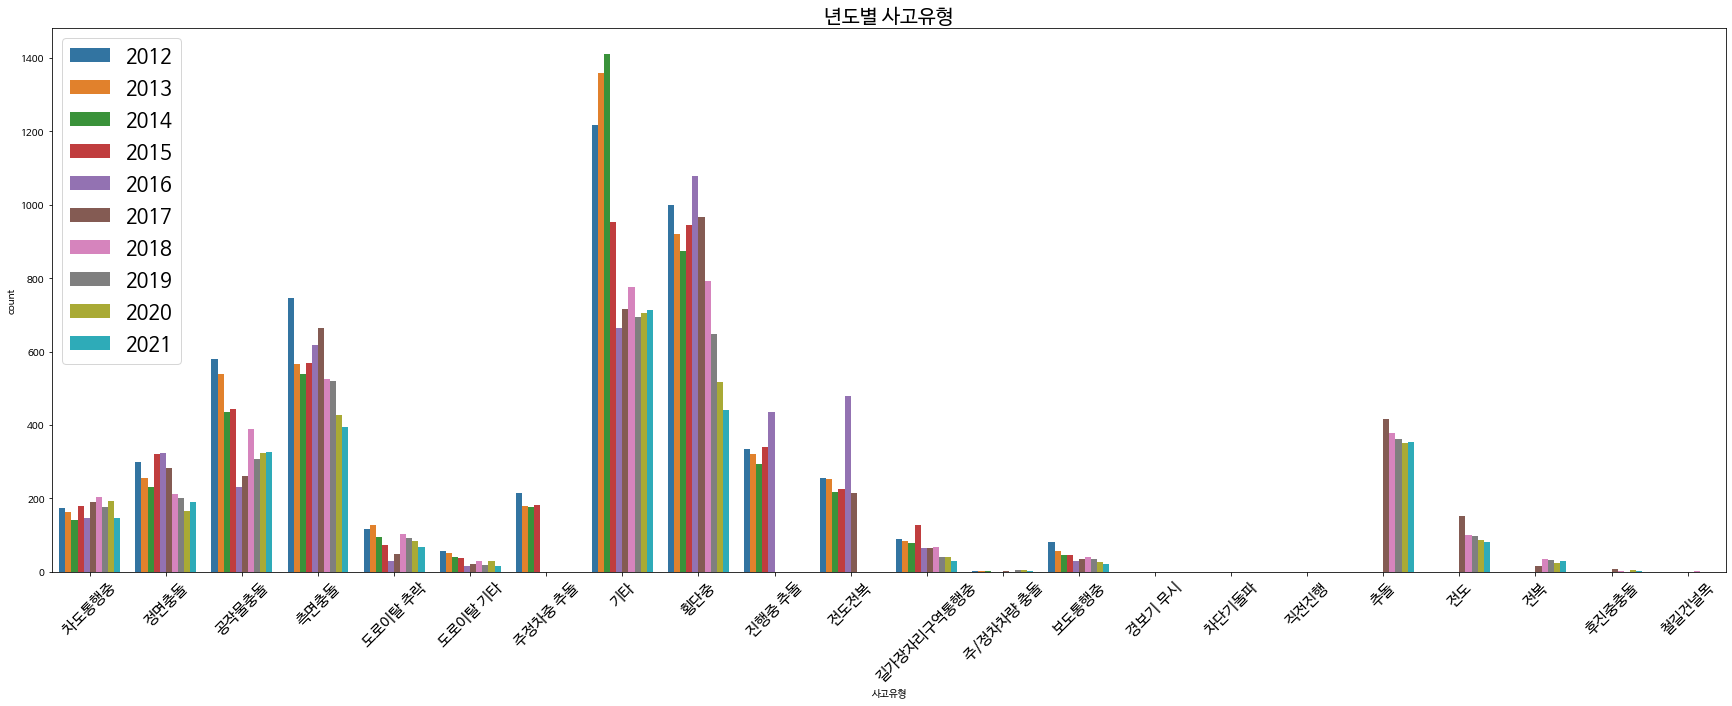

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(ta['사고유형'],hue=ta['년'])
plt.title('년도별 사고유형',size=20)
plt.xticks(rotation=45,size=15)
plt.legend(fontsize=20)
plt.show()

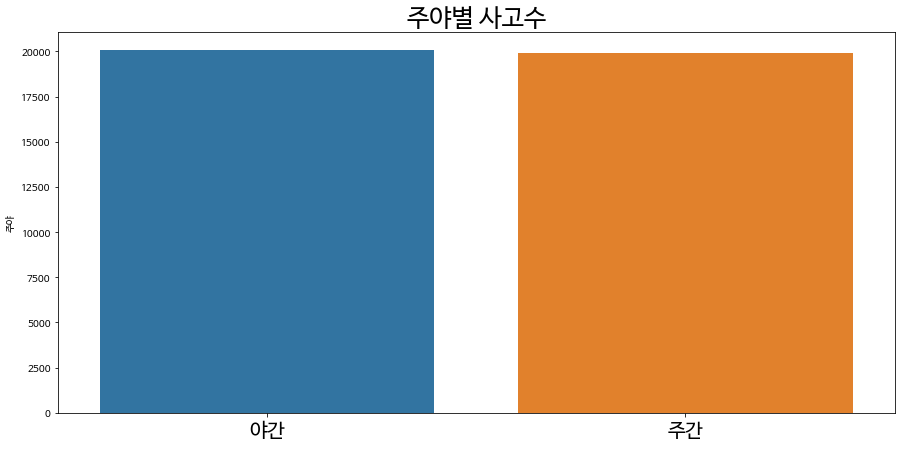

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = ta['주야'].value_counts().index ,y = ta['주야'].value_counts())
plt.title('주야별 사고수',size=25)
plt.xticks(size=20)

plt.show()

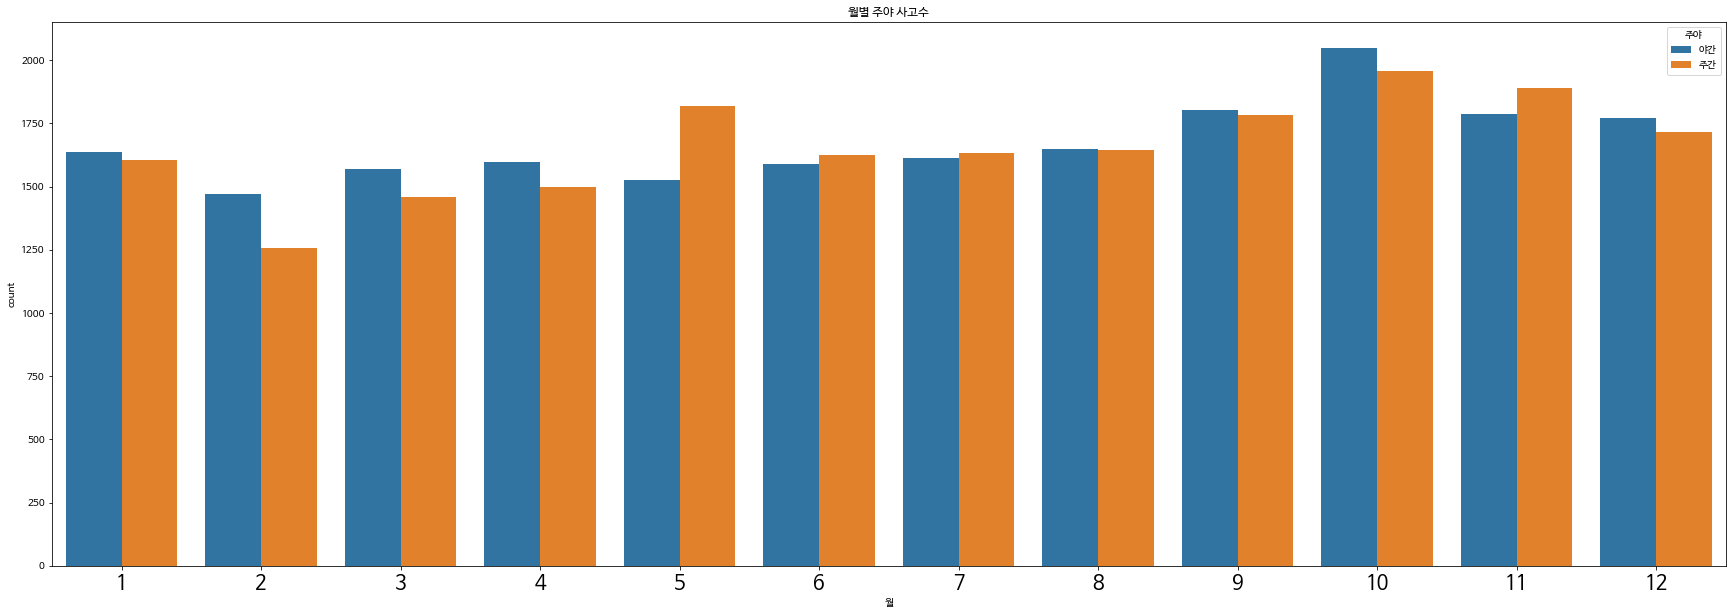

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(ta['월'],hue=ta['주야'])
plt.title('월별 주야 사고수')
plt.xticks(size=20)
plt.show()

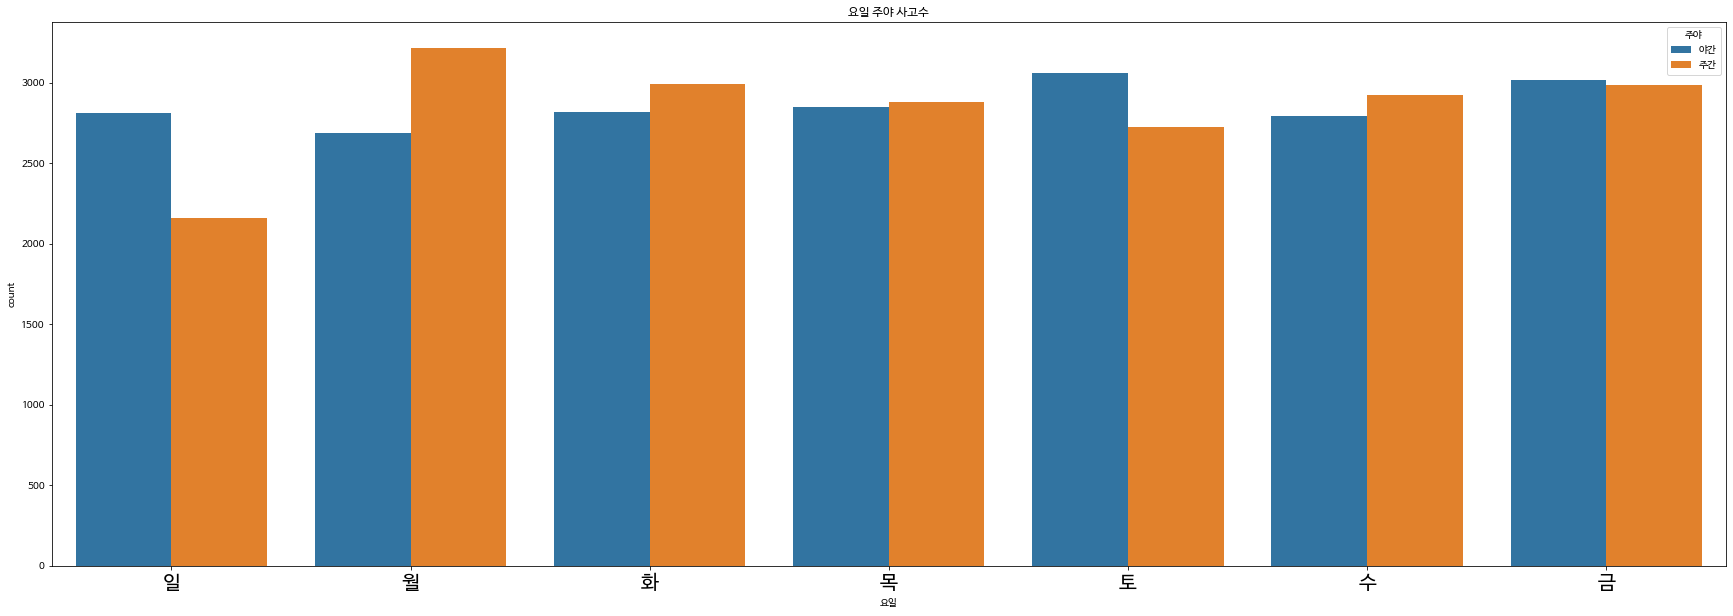

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(ta['요일'],hue=ta['주야'])
plt.title('요일 주야 사고수')
plt.xticks(size=20)
plt.show()

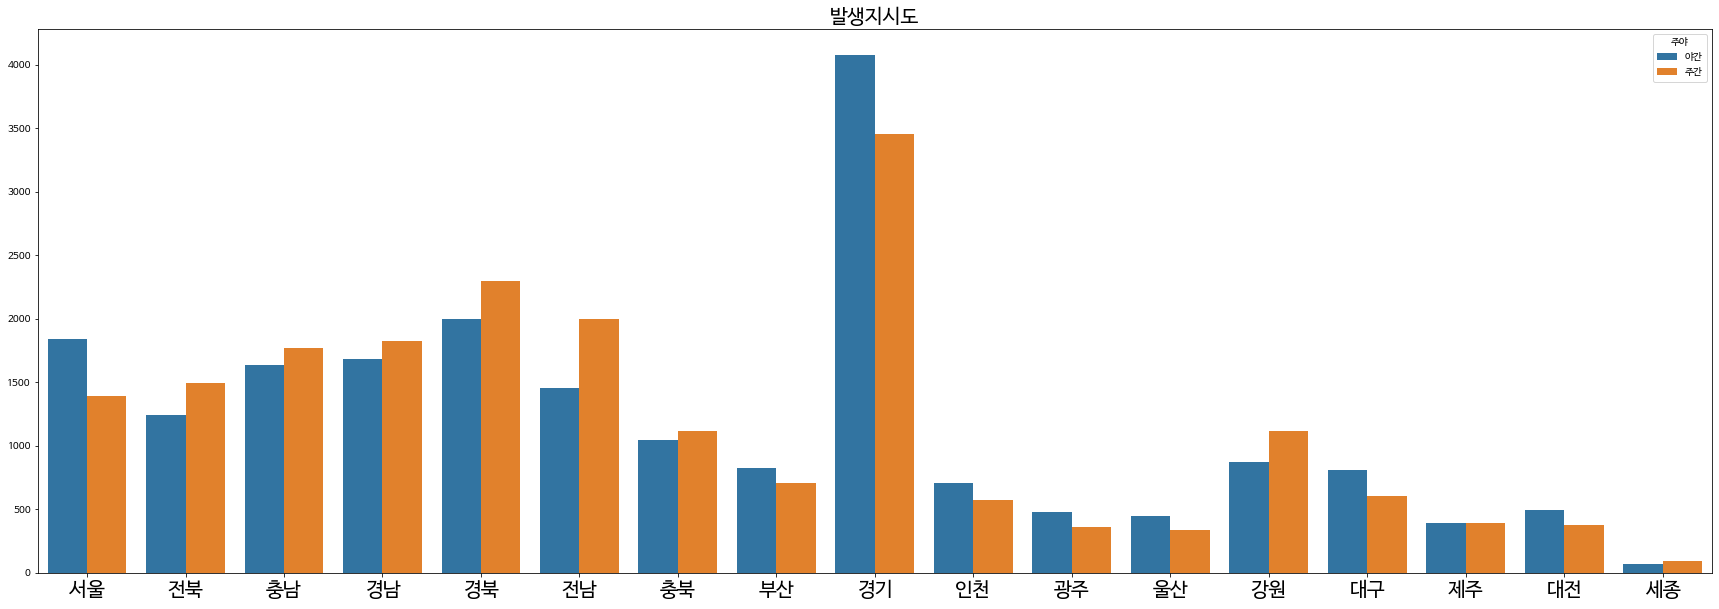

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(ta['발생지시도'],hue=ta['주야'])
plt.title('발생지시도',size=20)
plt.xticks(size=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

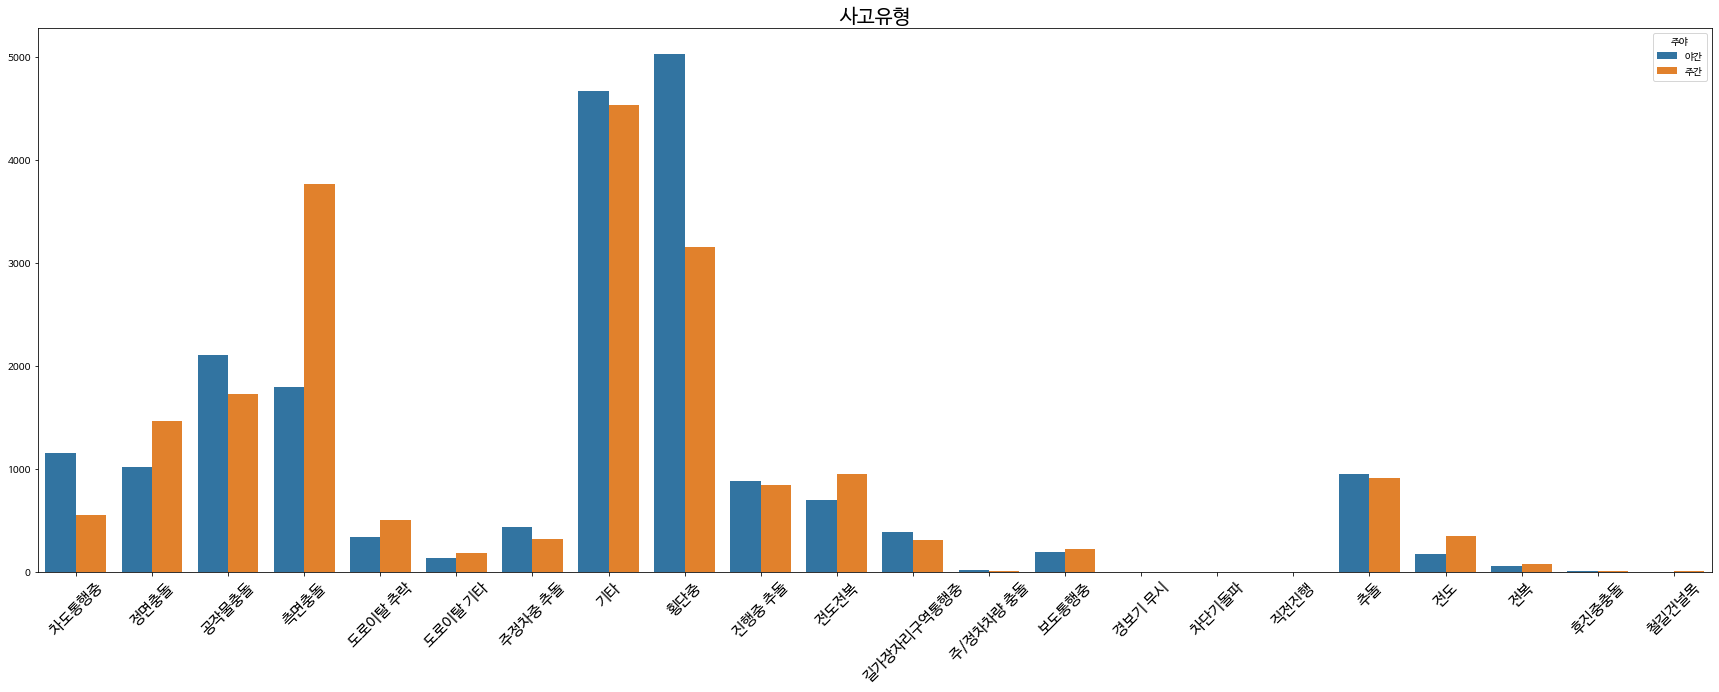

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(ta['사고유형'],hue=ta['주야'])
plt.title('사고유형',size=20)
plt.xticks(rotation=45,size=15)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
# 전체 사고 부상자 
def total_plot(df):
  plt.figure(figsize=(30,15))
    
  for idx in range(2,7):
    plt.subplot(2,3,idx-1)
    plot_df = df[df.iloc[:,idx] != 0]
    sns.countplot(plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


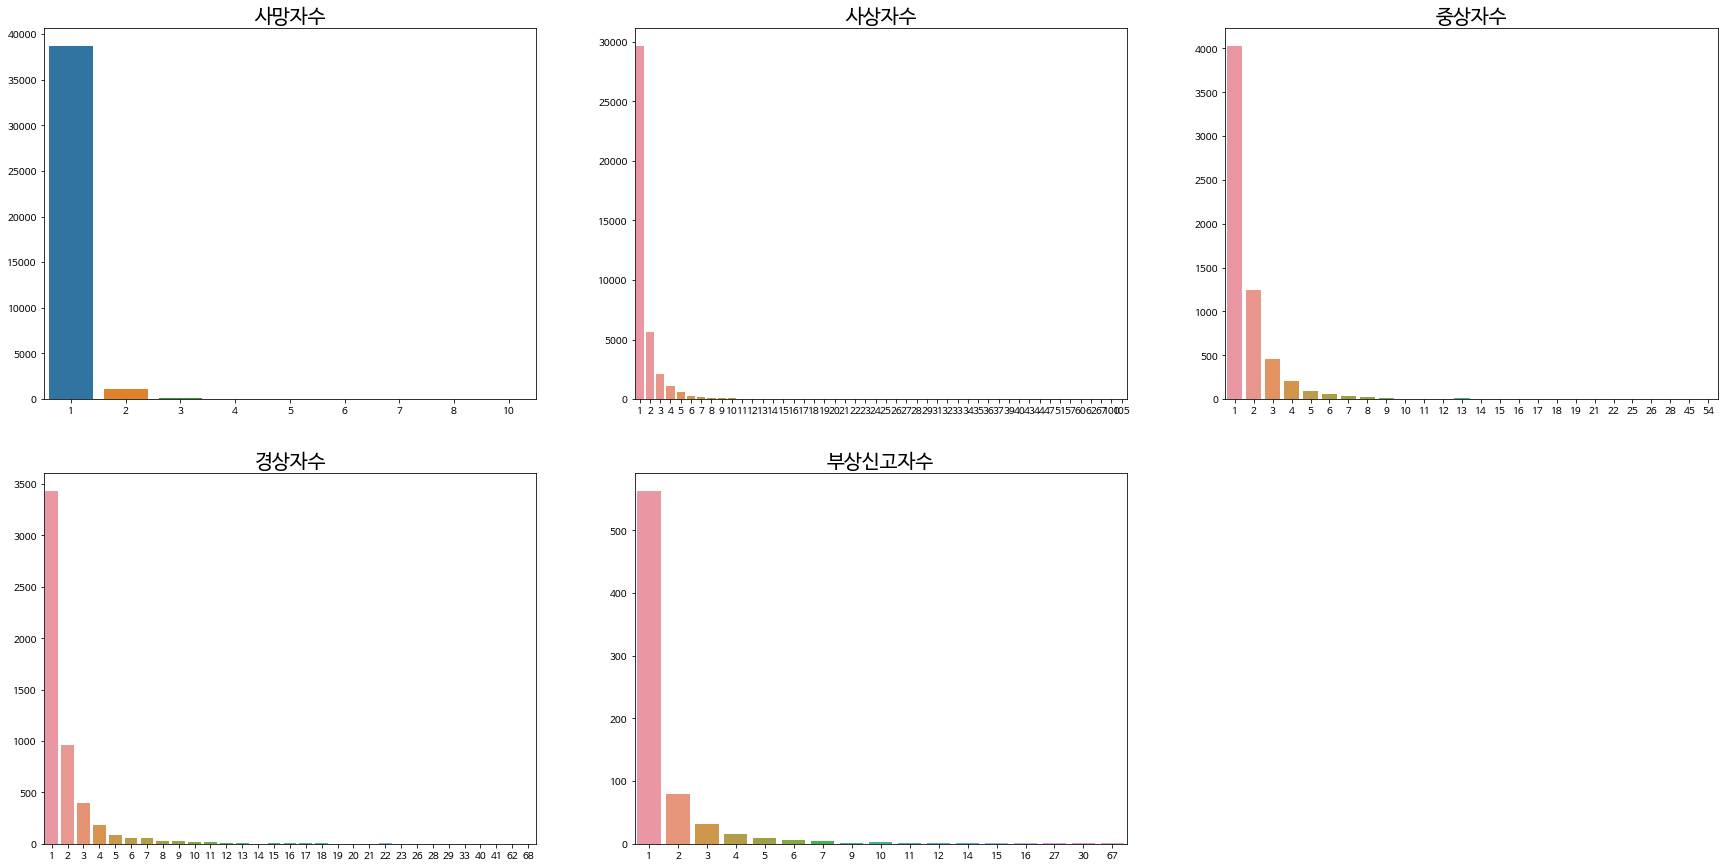

In [ ]:
total_plot(ta)

In [ ]:
# 년도별 사고 부상자 
def year_plot(df):
  plot_df = df.groupby('년').sum()
  
  plt.figure(figsize=(30,15))
    
  for idx in range(len(plot_df.columns[:-5])):
    plt.subplot(2,3,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


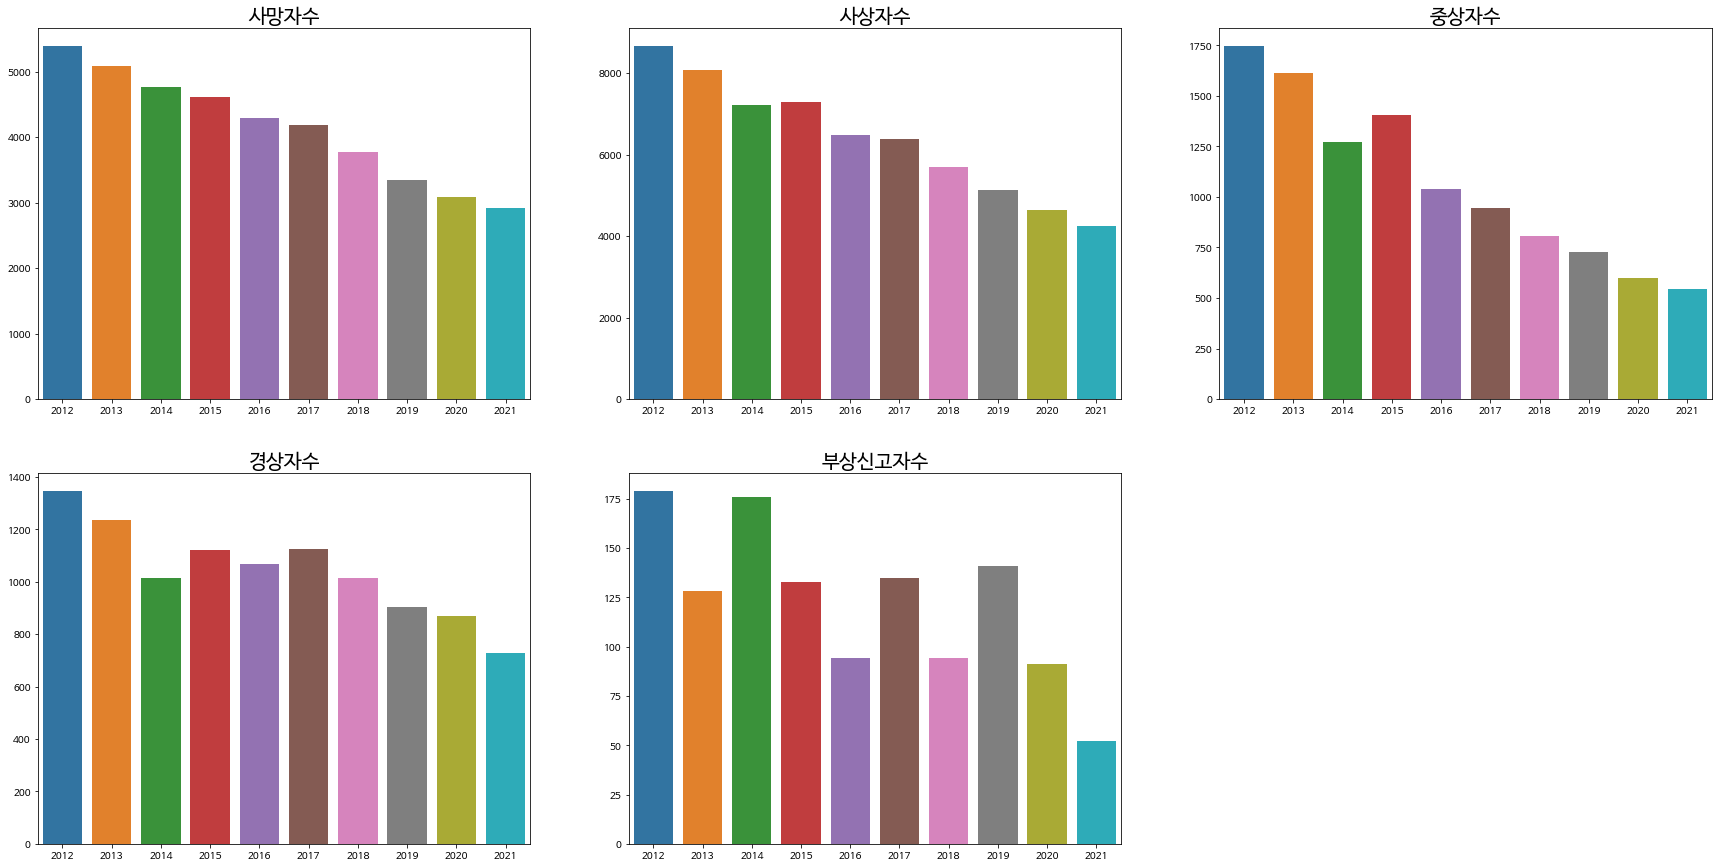

In [ ]:
year_plot(ta)

In [ ]:
# 월별 사고 부상자
def month_plot(df):
  plot_df = df.groupby('월').sum()
  
  plt.figure(figsize=(30,15))
    
  for idx in range(len(plot_df.columns[:-5])):
    plt.subplot(2,3,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


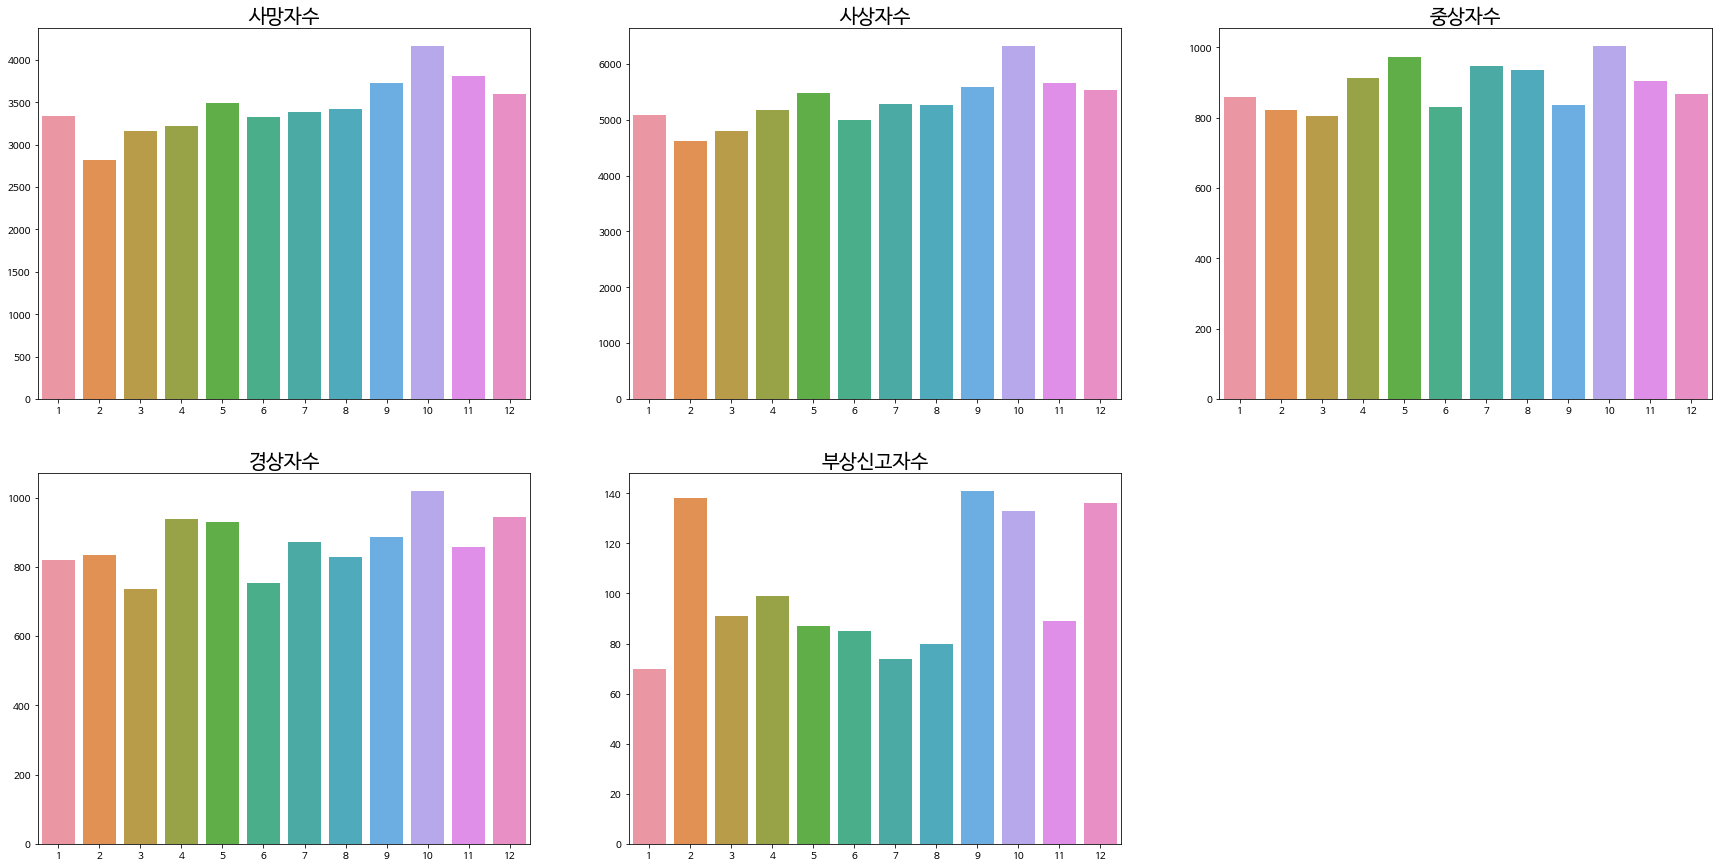

In [ ]:
month_plot(ta)

In [ ]:
# 지역별 사고 부상자
def point_plot(df):
  plot_df = df.groupby('발생지시도').sum()
  
  plt.figure(figsize=(30,15))
    
  for idx in range(len(plot_df.columns[:-5])):
    plt.subplot(2,3,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


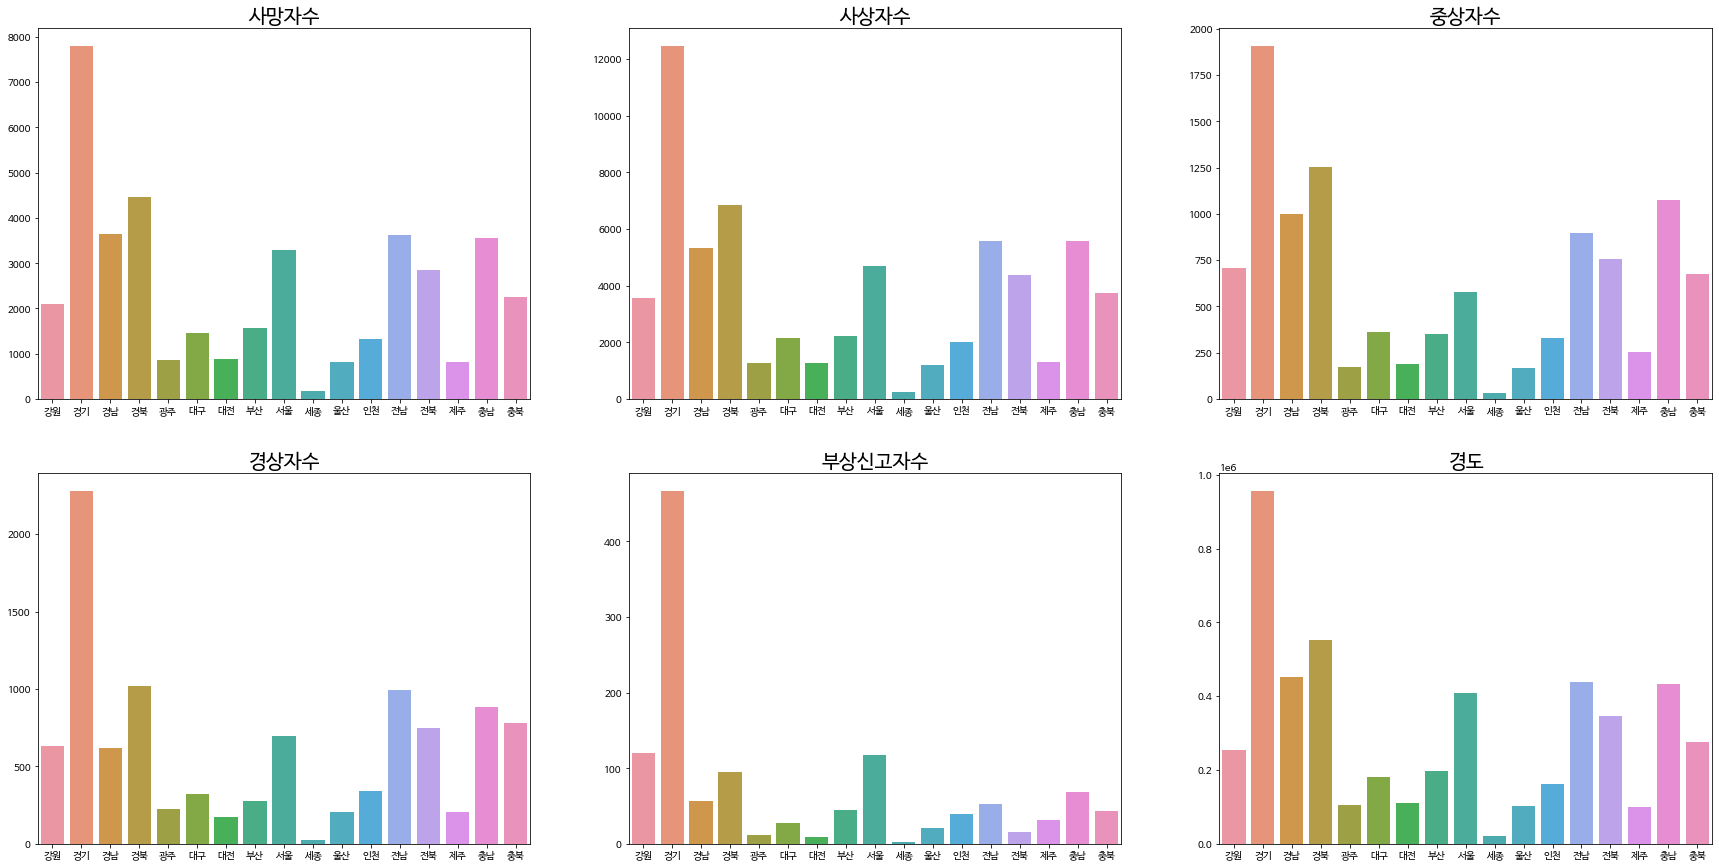

In [ ]:
point_plot(ta)

In [ ]:
# 주야별 사고 부상자
def day_plot(df):
  plot_df = df.groupby('요일').sum().reindex(weekday)
  
  plt.figure(figsize=(30,15))
    
  for idx in range(len(plot_df.columns[:-6])):
    plt.subplot(3,3,idx+1)
    sns.barplot(x=plot_df.index, y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


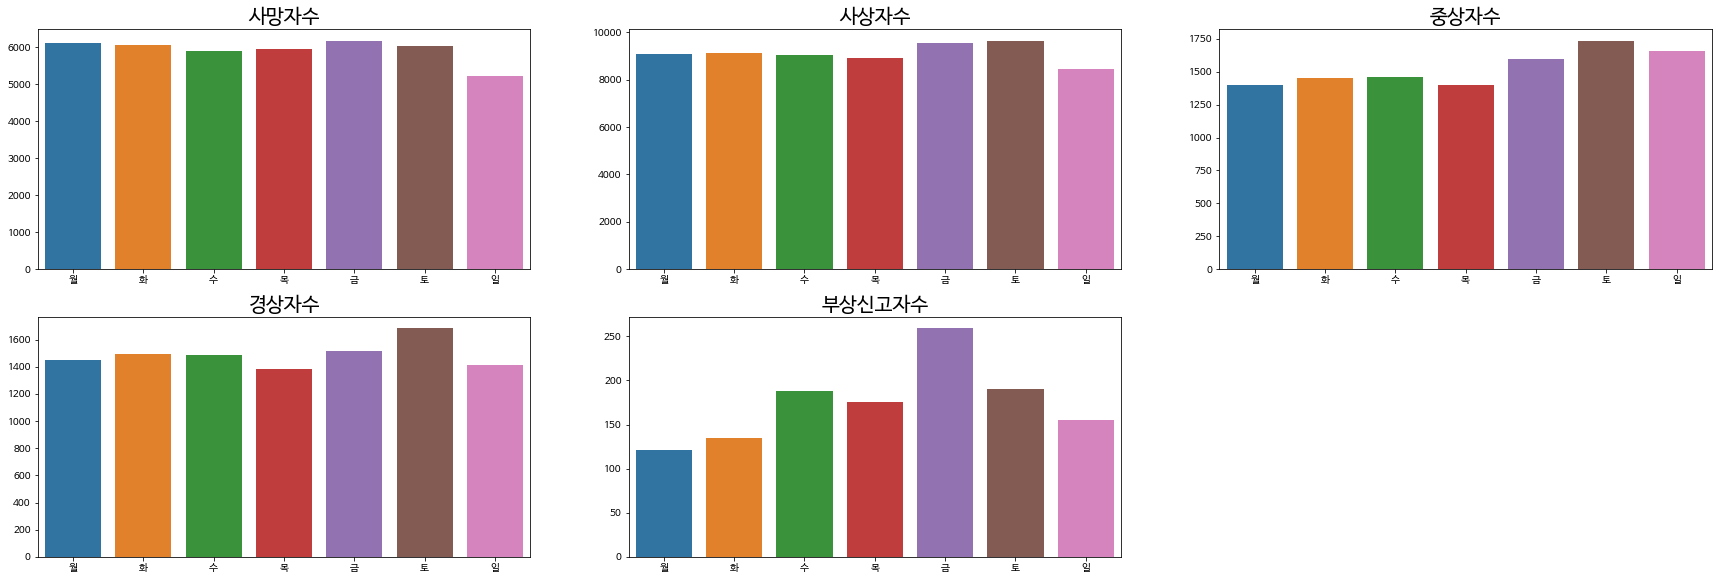

In [ ]:
day_plot(ta)

In [ ]:
# 주야별 사고 부상자
def time_plot(df):
  plot_df = df.groupby('주야').sum()
  
  plt.figure(figsize=(30,15))
    
  for idx in range(len(plot_df.columns[:-6])):
    plt.subplot(2,3,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


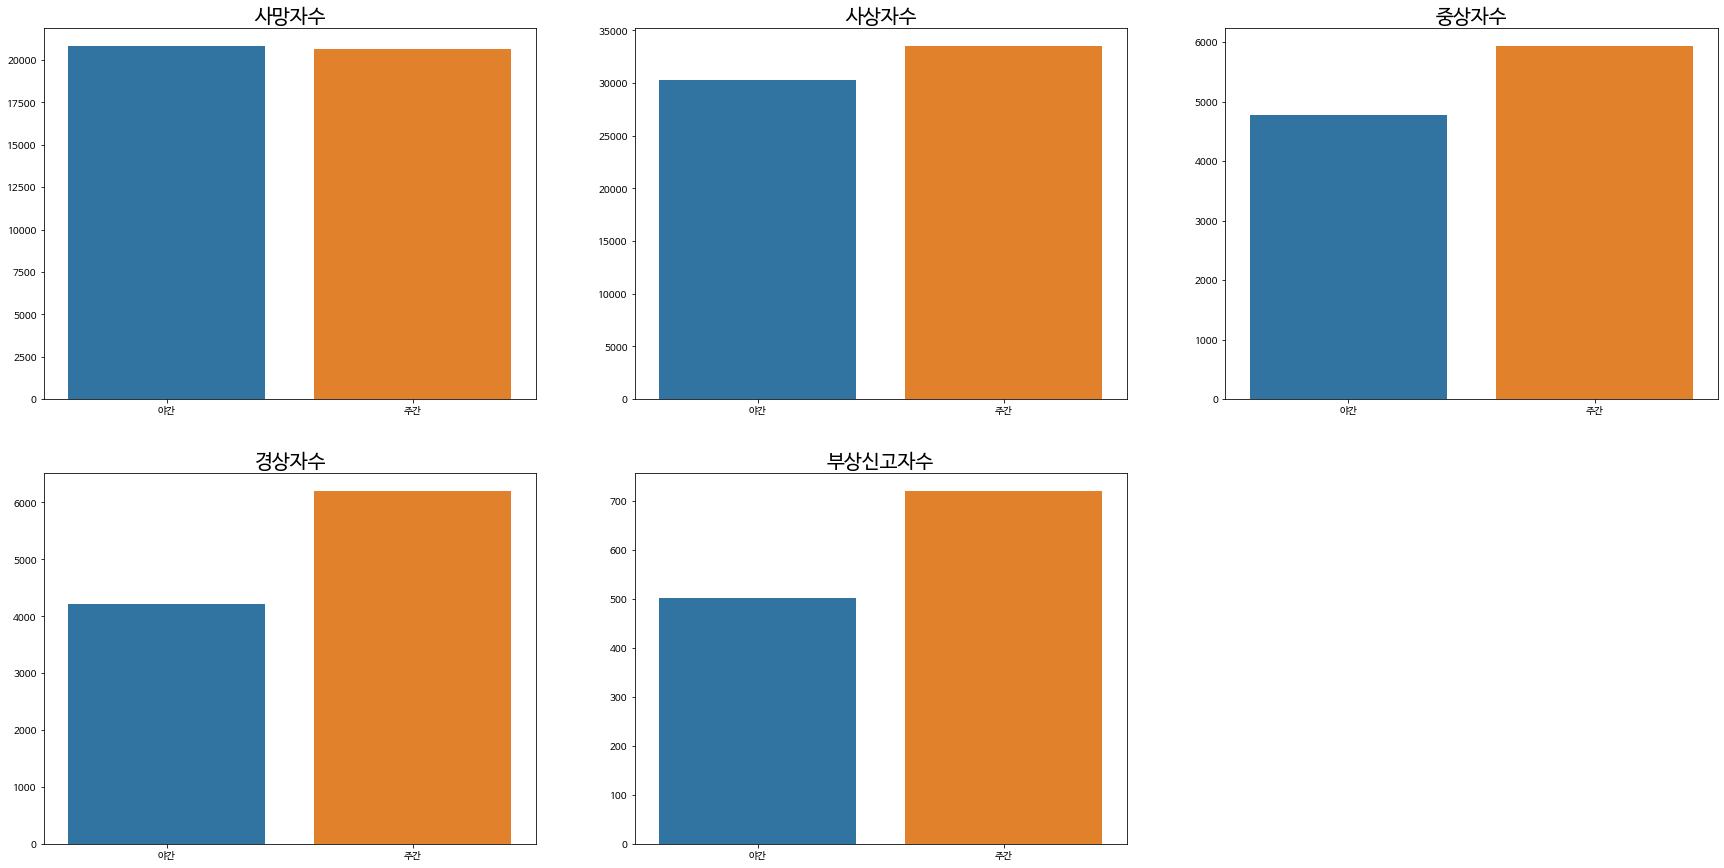

In [ ]:
time_plot(ta)

In [ ]:
# 사고유형별 부상자
def type_plot(df):
  plot_df = df.groupby('사고유형').sum()
  
  plt.figure(figsize=(30,15))
  plt.subplots_adjust(hspace=0.3)

  for idx in range(len(plot_df.columns[:-6])):
    plt.subplot(2,3,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45,size=10)
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


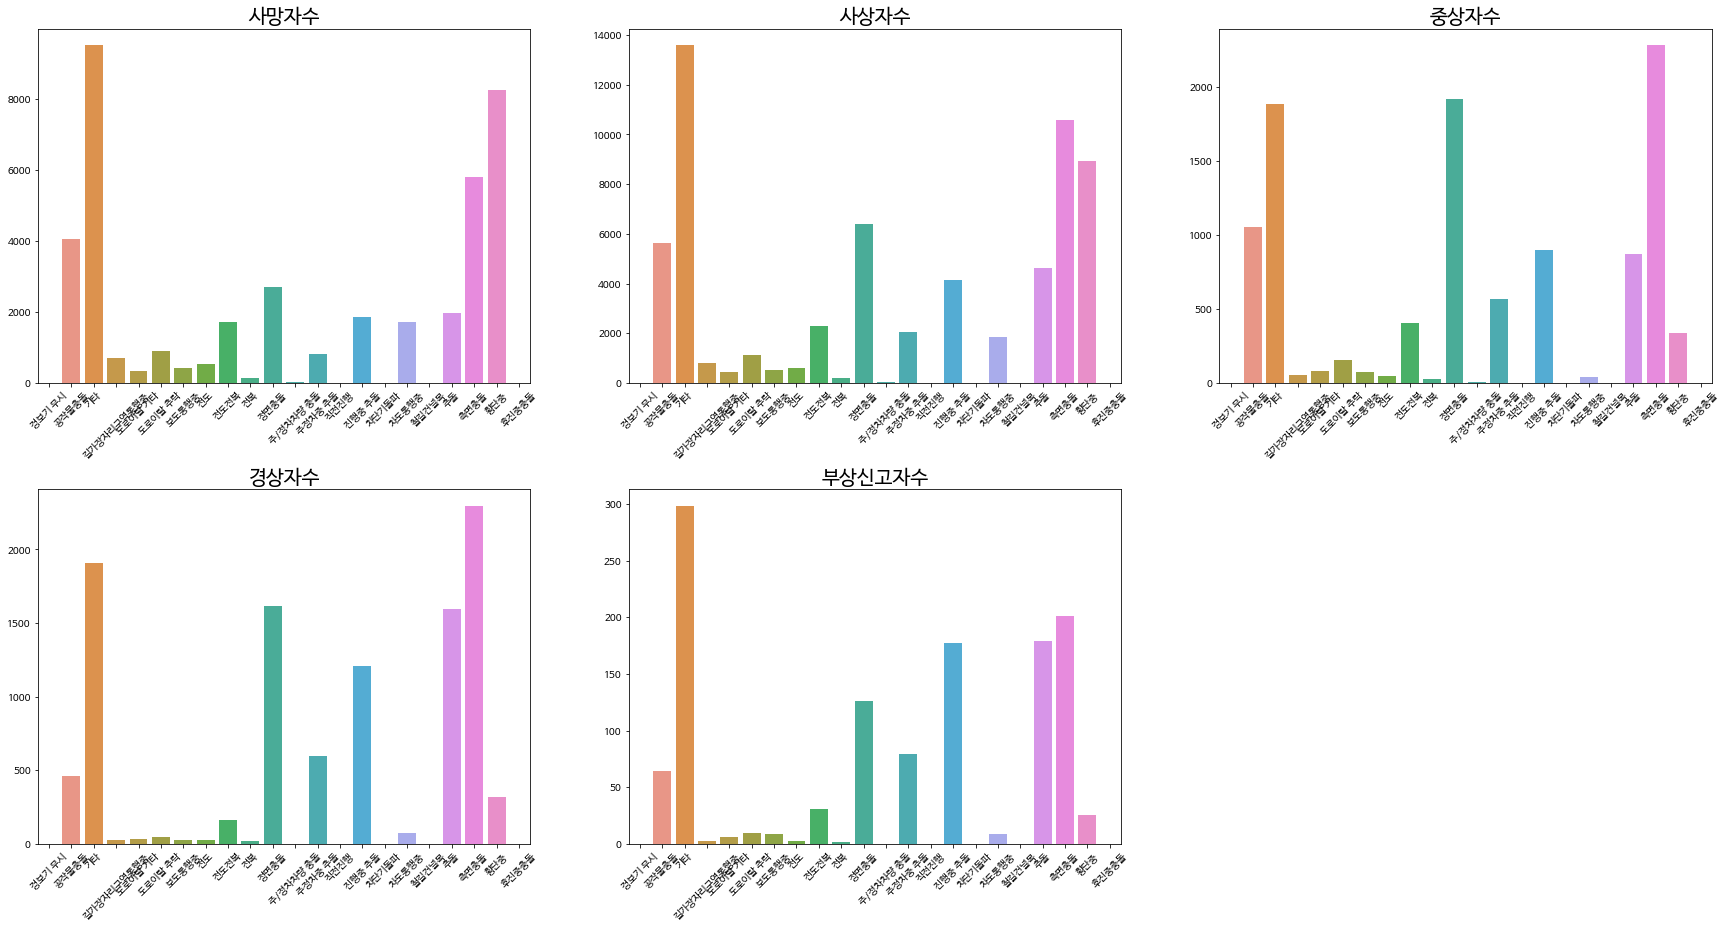

In [ ]:
type_plot(ta)

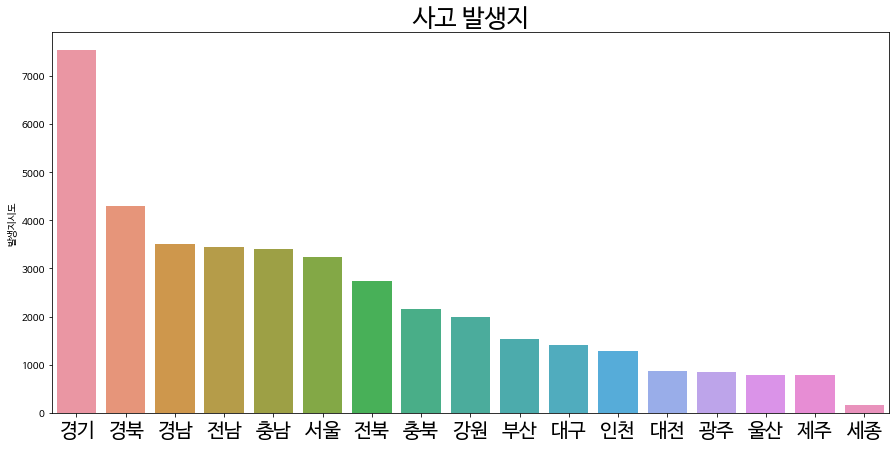

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = ta['발생지시도'].value_counts().index ,y = ta['발생지시도'].value_counts())
plt.title('사고 발생지',size=25)
plt.xticks(size=20)

plt.show()

In [ ]:
# 사고유형별 부상자
def wounded(df):
  plot_df = df.groupby('발생지시도')
  
  plt.figure(figsize=(30,15))
  plt.subplots_adjust(hspace=1)

  for idx in range(len(df['발생지시도'].unique())):
    plt.subplot(3,6,idx+1)
    sns.barplot(x = plot_df.get_group(df['발생지시도'].unique()[idx])['사고유형'].value_counts().index , y = plot_df.get_group(df['발생지시도'].unique()[idx])['사고유형'].value_counts())
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45,size=10)
    plt.title(df['발생지시도'].unique()[idx],size=20)
  plt.show()


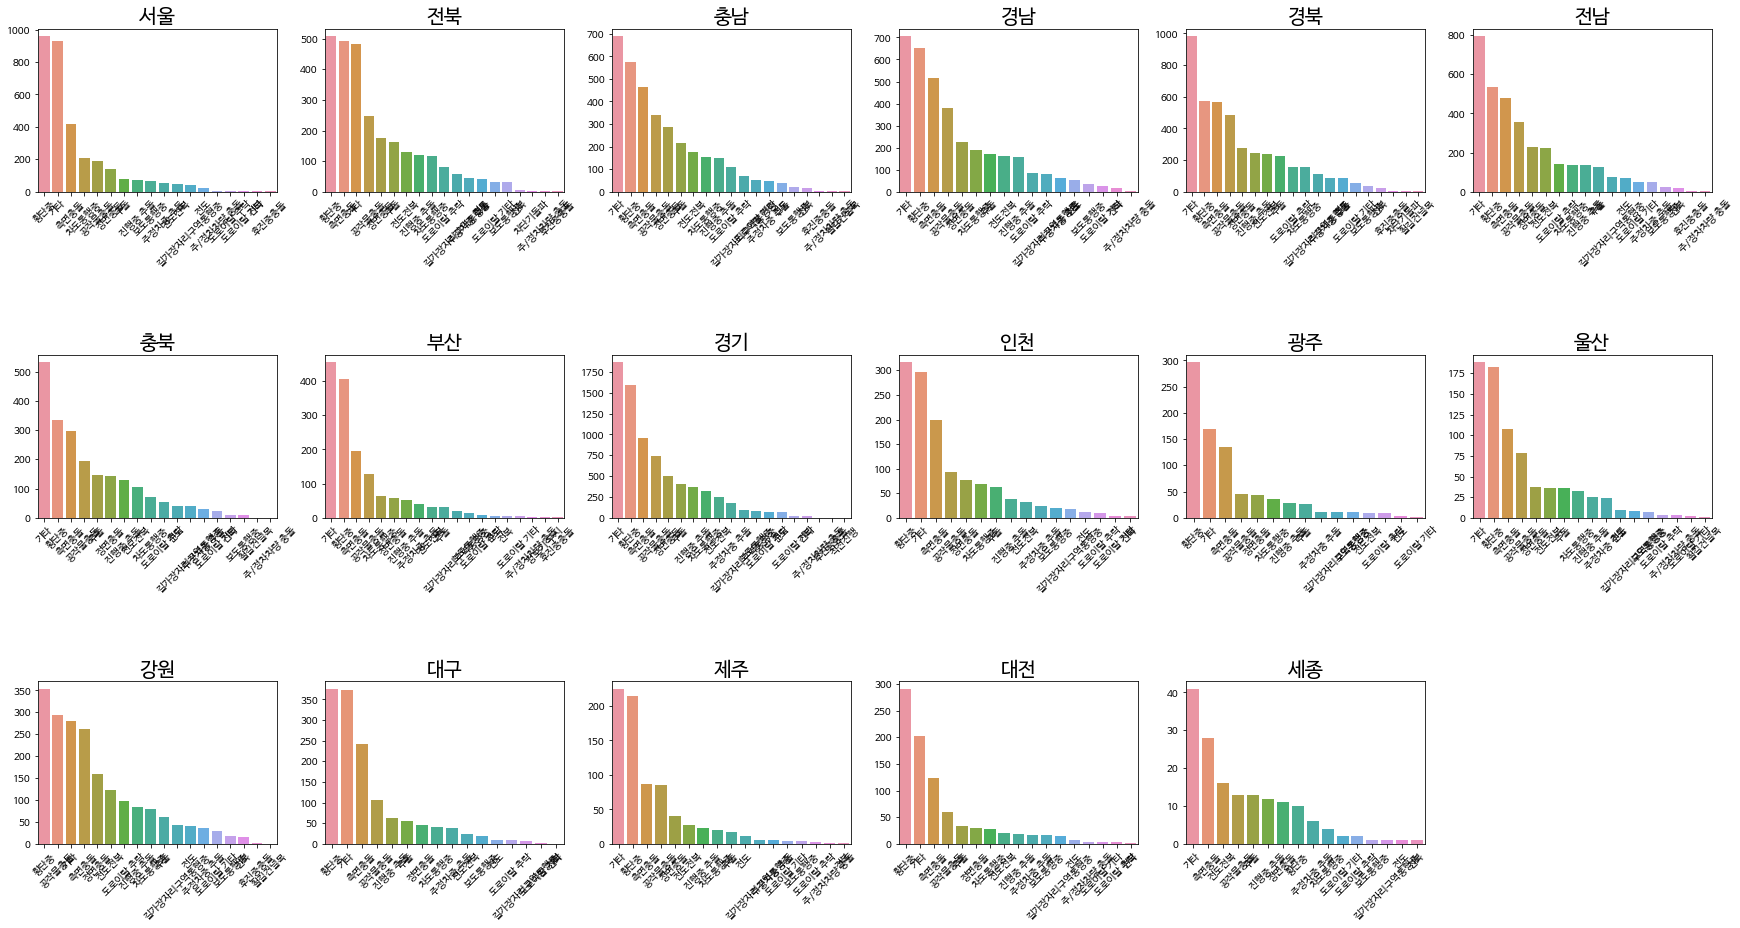

In [ ]:
wounded(ta)

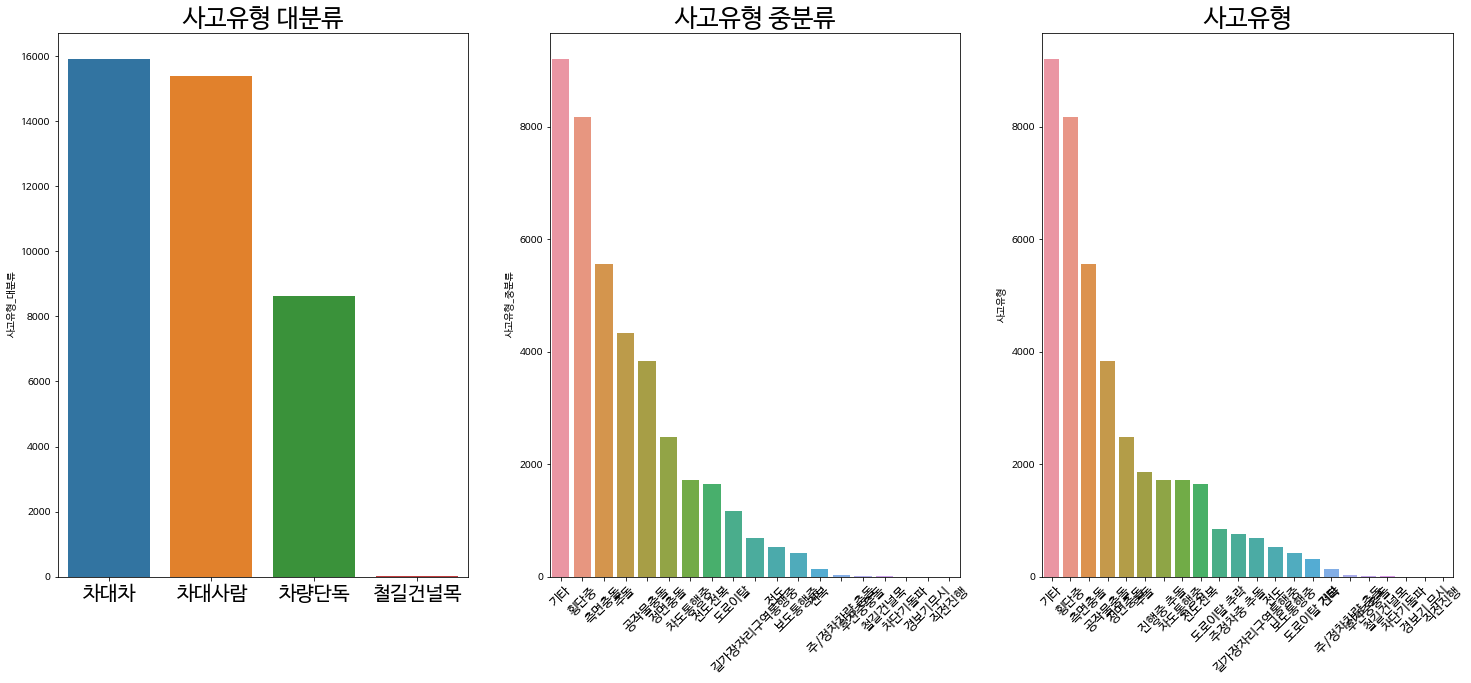

In [ ]:
# 교통 사고 유형
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.barplot(x = ta['사고유형_대분류'].value_counts().index ,y = ta['사고유형_대분류'].value_counts())
plt.title('사고유형 대분류',size=25)
plt.xticks(size=20)

plt.subplot(1,3,2)
sns.barplot(x = ta['사고유형_중분류'].value_counts().index ,y = ta['사고유형_중분류'].value_counts())
plt.title('사고유형 중분류',size=25)
plt.xticks(rotation=45,size=13)

plt.subplot(1,3,3)
sns.barplot(x = ta['사고유형'].value_counts().index ,y = ta['사고유형'].value_counts())
plt.title('사고유형',size=25)
plt.xticks(rotation=45,size=13)

plt.show()

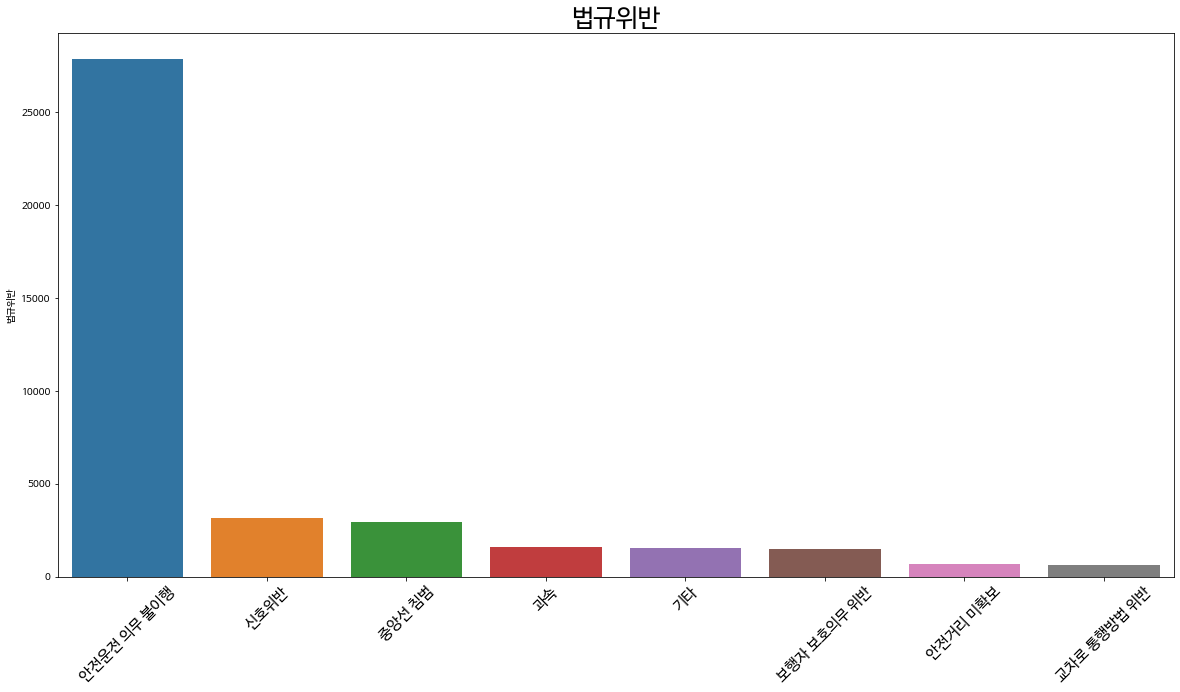

In [ ]:
# 법규위반
plt.figure(figsize=(20,10))
sns.barplot(x = ta['법규위반'].value_counts().index ,y = ta['법규위반'].value_counts())
plt.title('법규위반',size=25)
plt.xticks(rotation=45,size=15)
plt.show()

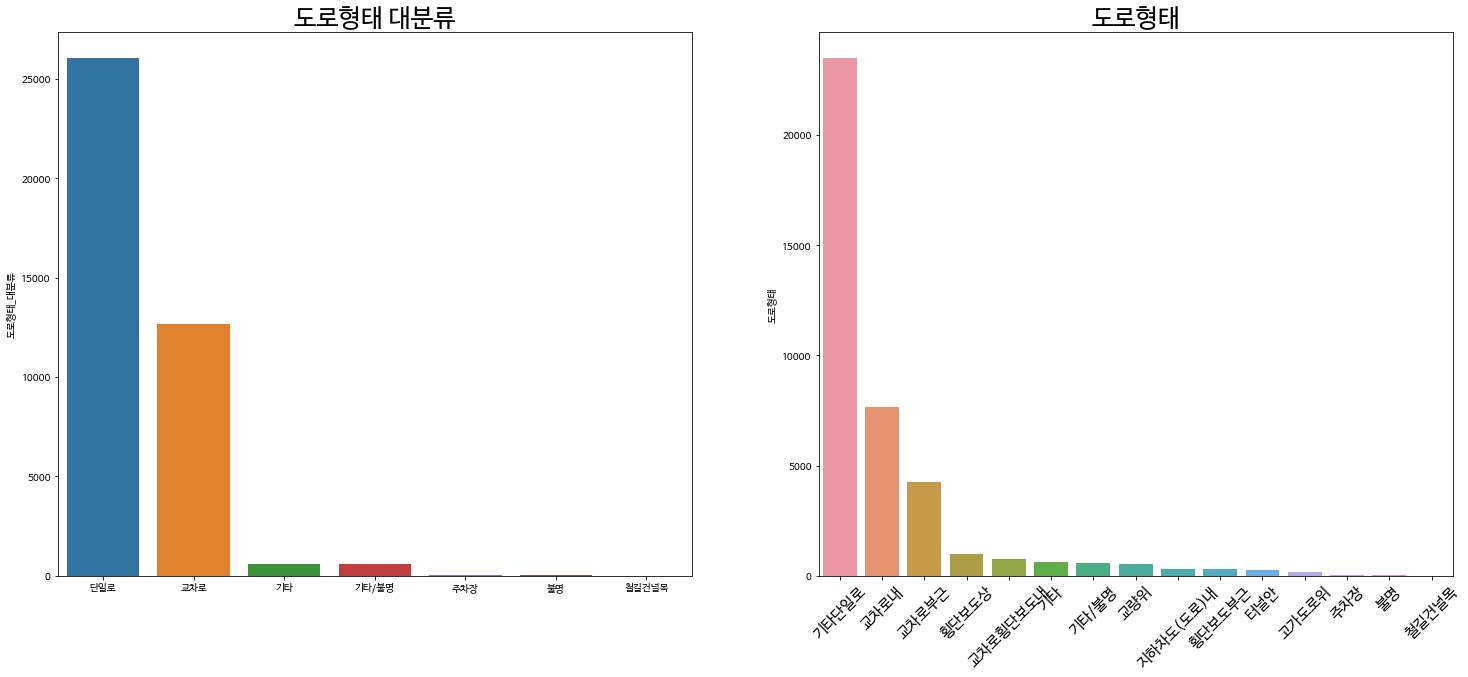

In [ ]:
# 도로 형태
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.barplot(x = ta['도로형태_대분류'].value_counts().index ,y = ta['도로형태_대분류'].value_counts())
plt.title('도로형태 대분류',size=25)

plt.subplot(1,2,2)
sns.barplot(x = ta['도로형태'].value_counts().index ,y = ta['도로형태'].value_counts())
plt.title('도로형태',size=25)
plt.xticks(rotation=45,size=15)

plt.show()

In [ ]:
import folium as g

plot_df = ta[ta['발생지시도'] == '강원'].sample(100)

center_longitude, center_latitude = plot_df['위도'].mean(), plot_df['경도'].mean()

g_map = g.Map(location=[center_longitude,center_latitude],
              tiles='Stamen Terrain',
              zoom_start=12)

for lon, lat in zip(plot_df['위도'],plot_df['경도']):
    marker = g.Marker([lon,lat],
                      icon= g.Icon(color='red')).add_to(g_map)

In [ ]:
g_map